## This Jupyter Notebook serves as a demo Workflow of cleaning and exploring IgE measurements with Pax for an allergen panel involve testing blood samples to detect Immunoglobulin E (IgE) antibody levels against specific allergens using the Pax system.

Fill in the empty code cells below. Feel free to add more code cells if needed.

### Data upload:
- Use the upload button on the left to upload the file: 'PAX_Data.xlsx'
- By default the data should have been upload to into the folder '/content'

## Load the required modules
- Just run the following code-cell to load all modules needed for this exercise

In [1]:
import os
import pandas as pd
import numpy as np

### Checking the working directory:
- use 'os.getcwd()' method to check for the current working directory.
- If you are using Google Colab, the default working directory should be the folder 'content'
- If not, use the 'os. chdir(<path>)' method to make sure to set the working directory

In [2]:
os.getcwd()

'i:\\DII ALL2\\Theresa\\R Kurse\\Data SCience 2 Assignment'

## Read the excel file
- if you are not using Google Colab, make sure to set the path to your data file correctly: \'<FILE-PATH\>/PAX_Data.xlsx'
- use: 'Sheet1' as sheet_name
- ignore the header: header=None
- assign the loaded data to a variable called: df


In [3]:
df = pd.read_excel('i:\\DII ALL2\\Theresa\\R Kurse\\Data SCience 2 Assignment/PAX_Data.xlsx', sheet_name='Sheet1', header=None)

### Print the 'shape' of the dataframe

In [4]:
print(df.shape)

(250, 6616)


### Print the number of rows:

In [5]:
print(len(df))

250


### Use the 'head' method to have a look at the first 10 rows of the table

In [6]:
print(df.head(10))

           0                1               2               3     \
0  Date of test       2023-04-13      2023-04-13      2023-04-13   
1   Test number      2334000487D     2331000683D     2331000884D   
2       Country            Spain      Netherland         Germany   
3       Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
4           Sex           Female            Male            Male   
5         Cyn d             18.5           19.67           20.11   
6      rCyn d 1            22.99           21.95           20.66   
7         Dac g            19.15           19.57           21.78   
8         Fes p            21.84            21.3           26.96   
9      rLol p 1            22.33           22.23           22.59   

             4                 5               6               7     \
0      2023-04-13        2023-04-13      2023-04-13      2023-04-13   
1     2331000880D       2331000851D     2331001025D     2331000881D   
2         Germany        Netherland   

### Splitting the Data:
- As you can see, row 0 to 4 contains the metadata of the experiment
- Row 5 to end contains the measured expression data of Allergens

Now, we need to split the data into:
- Metadata and
- Expression data

Check the documentation of the pandas method 'iloc'
- Split the data, row 0 to 4 and assing it to a variable called: md
- From row 5 to end, assing the expression data to a variable called: expr

In [7]:
md = df.iloc[0:5,:]
print(md)

           0                1               2               3     \
0  Date of test       2023-04-13      2023-04-13      2023-04-13   
1   Test number      2334000487D     2331000683D     2331000884D   
2       Country            Spain      Netherland         Germany   
3       Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
4           Sex           Female            Male            Male   

             4                 5               6               7     \
0      2023-04-13        2023-04-13      2023-04-13      2023-04-13   
1     2331000880D       2331000851D     2331001025D     2331000881D   
2         Germany        Netherland          Sweden         Germany   
3  7Years 9Months  11Years 11Months  4Years 8Months  1Years 9Months   
4          Female              Male          Female            Male   

             8               9     ...            6606            6607  \
0      2023-04-13      2023-04-13  ...      2023-06-30      2023-06-30   
1     2331000879

In [8]:
expr = df.drop(df.columns[[0,1,2,3,4,]])
print(expr)

              0      1      2      3      4      5      6      7      8     \
5            Cyn d   18.5  19.67  20.11  18.09  17.92  17.78  18.64   21.3   
6         rCyn d 1  22.99  21.95  20.66  21.68  20.56  21.62  22.83   23.2   
7            Dac g  19.15  19.57  21.78  18.37  18.12  19.35  19.95  21.52   
8            Fes p  21.84   21.3  26.96  24.05  23.21  22.62  21.98  24.55   
9         rLol p 1  22.33  22.23  22.59  21.99  23.16  21.27  22.99  23.95   
..             ...    ...    ...    ...    ...    ...    ...    ...    ...   
245         Sola t  22.05  22.33  22.33  21.61  21.85  20.94  19.71  21.27   
246      rSola t 2  22.36  24.08  24.08  16.39  16.83  30.73  18.29   19.2   
247  rSola t_GBSSI  23.43  24.02  24.02  19.78  20.01  24.56  23.26  21.62   
248      rHom s LF  27.51  27.94  27.94  27.75  27.55   27.9  27.82  27.71   
249        CCD-HSA     27  25.61  25.61  24.08  22.01  21.98  21.86  21.37   

      9     ...   6606   6607   6608   6609   6610   6611   661

### Print the 'shape' of each new table

In [9]:
print(md.shape)
print(expr.shape)

(5, 6616)
(245, 6616)


### Use the 'head' method to inspect the expr table


In [10]:
print(expr.head)

<bound method NDFrame.head of               0      1      2      3      4      5      6      7      8     \
5            Cyn d   18.5  19.67  20.11  18.09  17.92  17.78  18.64   21.3   
6         rCyn d 1  22.99  21.95  20.66  21.68  20.56  21.62  22.83   23.2   
7            Dac g  19.15  19.57  21.78  18.37  18.12  19.35  19.95  21.52   
8            Fes p  21.84   21.3  26.96  24.05  23.21  22.62  21.98  24.55   
9         rLol p 1  22.33  22.23  22.59  21.99  23.16  21.27  22.99  23.95   
..             ...    ...    ...    ...    ...    ...    ...    ...    ...   
245         Sola t  22.05  22.33  22.33  21.61  21.85  20.94  19.71  21.27   
246      rSola t 2  22.36  24.08  24.08  16.39  16.83  30.73  18.29   19.2   
247  rSola t_GBSSI  23.43  24.02  24.02  19.78  20.01  24.56  23.26  21.62   
248      rHom s LF  27.51  27.94  27.94  27.75  27.55   27.9  27.82  27.71   
249        CCD-HSA     27  25.61  25.61  24.08  22.01  21.98  21.86  21.37   

      9     ...   6606   6607   6

As you can see column 0 contains the name of the Allergens

- Set the Allergen names as the index of the table (similar to rownames in R)example:   'expr.index = ...'
- 'drop' the column 0 and override the current variable

In [11]:
expr.index = expr[0]
print(expr)


                        0      1      2      3      4      5      6      7     \
0                                                                               
Cyn d                  Cyn d   18.5  19.67  20.11  18.09  17.92  17.78  18.64   
rCyn d 1            rCyn d 1  22.99  21.95  20.66  21.68  20.56  21.62  22.83   
Dac g                  Dac g  19.15  19.57  21.78  18.37  18.12  19.35  19.95   
Fes p                  Fes p  21.84   21.3  26.96  24.05  23.21  22.62  21.98   
rLol p 1            rLol p 1  22.33  22.23  22.59  21.99  23.16  21.27  22.99   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
Sola t                Sola t  22.05  22.33  22.33  21.61  21.85  20.94  19.71   
rSola t 2          rSola t 2  22.36  24.08  24.08  16.39  16.83  30.73  18.29   
rSola t_GBSSI  rSola t_GBSSI  23.43  24.02  24.02  19.78  20.01  24.56  23.26   
rHom s LF          rHom s LF  27.51  27.94  27.94  27.75  27.55   27.9  27.82   
CCD-HSA              CCD-HSA

In [12]:
expr = expr.drop(columns=[0])
print(expr)

                1      2      3      4      5      6      7      8      9     \
0                                                                              
Cyn d           18.5  19.67  20.11  18.09  17.92  17.78  18.64   21.3   20.5   
rCyn d 1       22.99  21.95  20.66  21.68  20.56  21.62  22.83   23.2  25.07   
Dac g          19.15  19.57  21.78  18.37  18.12  19.35  19.95  21.52  20.55   
Fes p          21.84   21.3  26.96  24.05  23.21  22.62  21.98  24.55  20.39   
rLol p 1       22.33  22.23  22.59  21.99  23.16  21.27  22.99  23.95  21.35   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
Sola t         22.05  22.33  22.33  21.61  21.85  20.94  19.71  21.27  18.76   
rSola t 2      22.36  24.08  24.08  16.39  16.83  30.73  18.29   19.2  18.89   
rSola t_GBSSI  23.43  24.02  24.02  19.78  20.01  24.56  23.26  21.62  21.01   
rHom s LF      27.51  27.94  27.94  27.75  27.55   27.9  27.82  27.71  27.65   
CCD-HSA           27  25.61  25.61  24.0

### Cleaning the Metadata
- Use 'head' to look into the metadata
Note that we want to use the rows as columns, therefore:
- Transpose the metadata
- Change the table: row 0 should be the column names

In [13]:
print(md.head)

<bound method NDFrame.head of            0                1               2               3     \
0  Date of test       2023-04-13      2023-04-13      2023-04-13   
1   Test number      2334000487D     2331000683D     2331000884D   
2       Country            Spain      Netherland         Germany   
3       Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
4           Sex           Female            Male            Male   

             4                 5               6               7     \
0      2023-04-13        2023-04-13      2023-04-13      2023-04-13   
1     2331000880D       2331000851D     2331001025D     2331000881D   
2         Germany        Netherland          Sweden         Germany   
3  7Years 9Months  11Years 11Months  4Years 8Months  1Years 9Months   
4          Female              Male          Female            Male   

             8               9     ...            6606            6607  \
0      2023-04-13      2023-04-13  ...      2023-06-30      

In [14]:
md=md.T
print(md)

                 0            1           2                3       4
0     Date of test  Test number     Country          Age Y/M     Sex
1       2023-04-13  2334000487D       Spain  3Years 11Months  Female
2       2023-04-13  2331000683D  Netherland   2Years 8Months    Male
3       2023-04-13  2331000884D     Germany   2Years 8Months    Male
4       2023-04-13  2331000880D     Germany   7Years 9Months  Female
...            ...          ...         ...              ...     ...
6611    2023-06-30  2334002232D    Slovenia   2Years 5Months    Male
6612    2023-06-30  2344000712D          UK   2Years 5Months    Male
6613    2023-06-30  2331003547D  Netherland   2Years 5Months    Male
6614    2023-06-30  2344000711D          UK   2Years 5Months    Male
6615    2023-06-30  2334002236D       Spain   2Years 5Months    Male

[6616 rows x 5 columns]


In [15]:
md.columns=md.iloc[0]
print(md)

0     Date of test  Test number     Country          Age Y/M     Sex
0     Date of test  Test number     Country          Age Y/M     Sex
1       2023-04-13  2334000487D       Spain  3Years 11Months  Female
2       2023-04-13  2331000683D  Netherland   2Years 8Months    Male
3       2023-04-13  2331000884D     Germany   2Years 8Months    Male
4       2023-04-13  2331000880D     Germany   7Years 9Months  Female
...            ...          ...         ...              ...     ...
6611    2023-06-30  2334002232D    Slovenia   2Years 5Months    Male
6612    2023-06-30  2344000712D          UK   2Years 5Months    Male
6613    2023-06-30  2331003547D  Netherland   2Years 5Months    Male
6614    2023-06-30  2344000711D          UK   2Years 5Months    Male
6615    2023-06-30  2334002236D       Spain   2Years 5Months    Male

[6616 rows x 5 columns]


- Make sure to remove the first row, which now has become the column names

In [16]:
md = md.drop(index=0)
print(md)

0    Date of test  Test number     Country           Age Y/M     Sex
1      2023-04-13  2334000487D       Spain   3Years 11Months  Female
2      2023-04-13  2331000683D  Netherland    2Years 8Months    Male
3      2023-04-13  2331000884D     Germany    2Years 8Months    Male
4      2023-04-13  2331000880D     Germany    7Years 9Months  Female
5      2023-04-13  2331000851D  Netherland  11Years 11Months    Male
...           ...          ...         ...               ...     ...
6611   2023-06-30  2334002232D    Slovenia    2Years 5Months    Male
6612   2023-06-30  2344000712D          UK    2Years 5Months    Male
6613   2023-06-30  2331003547D  Netherland    2Years 5Months    Male
6614   2023-06-30  2344000711D          UK    2Years 5Months    Male
6615   2023-06-30  2334002236D       Spain    2Years 5Months    Male

[6615 rows x 5 columns]


### Use 'head' to inspect your table and make sure it looks as below:

	Date of test Test number	Country	Age Y/M**

1	2023-04-13	2334000487D	Spain	3Years 11Months

2	2023-04-13	2331000683D	Netherland	2Years 8Months

3	2023-04-13	2331000884D	Germany	2Years 8Months

4	2023-04-13	2331000880D	Germany	7Years 9Months

5	2023-04-13	2331000851D	Netherland	11Years 11Months

In [17]:
md.head

<bound method NDFrame.head of 0    Date of test  Test number     Country           Age Y/M     Sex
1      2023-04-13  2334000487D       Spain   3Years 11Months  Female
2      2023-04-13  2331000683D  Netherland    2Years 8Months    Male
3      2023-04-13  2331000884D     Germany    2Years 8Months    Male
4      2023-04-13  2331000880D     Germany    7Years 9Months  Female
5      2023-04-13  2331000851D  Netherland  11Years 11Months    Male
...           ...          ...         ...               ...     ...
6611   2023-06-30  2334002232D    Slovenia    2Years 5Months    Male
6612   2023-06-30  2344000712D          UK    2Years 5Months    Male
6613   2023-06-30  2331003547D  Netherland    2Years 5Months    Male
6614   2023-06-30  2344000711D          UK    2Years 5Months    Male
6615   2023-06-30  2334002236D       Spain    2Years 5Months    Male

[6615 rows x 5 columns]>

### Rename the Metadata columns
- rename the columns 'Date of test' to 'Date', 'Test number' to 'TestID' and 'Age Y/M' to 'Age (M)'

In [18]:
md = md.rename(columns={'Date of test':'Date','Test number':'TestID','Age Y/M':'Age (M)'})
print(md)

0           Date       TestID     Country           Age (M)     Sex
1     2023-04-13  2334000487D       Spain   3Years 11Months  Female
2     2023-04-13  2331000683D  Netherland    2Years 8Months    Male
3     2023-04-13  2331000884D     Germany    2Years 8Months    Male
4     2023-04-13  2331000880D     Germany    7Years 9Months  Female
5     2023-04-13  2331000851D  Netherland  11Years 11Months    Male
...          ...          ...         ...               ...     ...
6611  2023-06-30  2334002232D    Slovenia    2Years 5Months    Male
6612  2023-06-30  2344000712D          UK    2Years 5Months    Male
6613  2023-06-30  2331003547D  Netherland    2Years 5Months    Male
6614  2023-06-30  2344000711D          UK    2Years 5Months    Male
6615  2023-06-30  2334002236D       Spain    2Years 5Months    Male

[6615 rows x 5 columns]


### Convert the Age column
The function below converts a string into a number of total month e.g.:

"2Years 8Months" convert to 32.0

- use the below function to convert each 'string' from the Age column into a number (float)
- Hint: check the function '.apply(convert_to_month)' which works on a dataframe column

In [20]:
import re

def convert_to_months(duration_str):
        # Check for missing or empty entries
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return None


    # Regular expression to find years and months in the input string
    year_pattern = re.compile(r"(\d+)\s*Years?")
    month_pattern = re.compile(r"(\d+)\s*Months?")

    # Search for years and months in the input string
    years_match = year_pattern.search(duration_str)
    months_match = month_pattern.search(duration_str)

    # Extract years and months from the matches
    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    # Convert years to months and add to months
    total_months = (years * 12) + months

    return int(total_months)


In [21]:
# convert md['Age (M)'] to number
# write your code here:


md['Age (M)']=md['Age (M)'].apply(convert_to_months)

Check the result with 'head'

In [22]:
md.head

<bound method NDFrame.head of 0           Date       TestID     Country  Age (M)     Sex
1     2023-04-13  2334000487D       Spain     47.0  Female
2     2023-04-13  2331000683D  Netherland     32.0    Male
3     2023-04-13  2331000884D     Germany     32.0    Male
4     2023-04-13  2331000880D     Germany     93.0  Female
5     2023-04-13  2331000851D  Netherland    143.0    Male
...          ...          ...         ...      ...     ...
6611  2023-06-30  2334002232D    Slovenia     29.0    Male
6612  2023-06-30  2344000712D          UK     29.0    Male
6613  2023-06-30  2331003547D  Netherland     29.0    Male
6614  2023-06-30  2344000711D          UK     29.0    Male
6615  2023-06-30  2334002236D       Spain     29.0    Male

[6615 rows x 5 columns]>

### Rename the columns of expr
- use the Test Number from md['Test number'] as new column names for the expr data

In [23]:
expr.columns = md['TestID']
print(expr)

TestID        2334000487D 2331000683D 2331000884D 2331000880D 2331000851D  \
0                                                                           
Cyn d                18.5       19.67       20.11       18.09       17.92   
rCyn d 1            22.99       21.95       20.66       21.68       20.56   
Dac g               19.15       19.57       21.78       18.37       18.12   
Fes p               21.84        21.3       26.96       24.05       23.21   
rLol p 1            22.33       22.23       22.59       21.99       23.16   
...                   ...         ...         ...         ...         ...   
Sola t              22.05       22.33       22.33       21.61       21.85   
rSola t 2           22.36       24.08       24.08       16.39       16.83   
rSola t_GBSSI       23.43       24.02       24.02       19.78       20.01   
rHom s LF           27.51       27.94       27.94       27.75       27.55   
CCD-HSA                27       25.61       25.61       24.08       22.01   

### Print the shapes of both tables
- check if the number of columns in expr matches the number of rows in md

In [24]:
print(expr.shape)
print(md.shape)

(245, 6615)
(6615, 5)


### Dropping duplicates and keep='first'

In [25]:
# This function can be use to inspect if there a duplictes within a column
md['TestID'].duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
6611    False
6612    False
6613     True
6614    False
6615    False
Name: TestID, Length: 6615, dtype: bool

In [28]:
# remove duplicate values in TestID column
# Hint: check the function: 'drop_duplicates'
# Hint: use the parameter 'keep='first'' to keep the first occurance and remove following duplicates
md = md.drop_duplicates(subset='TestID',keep='first')
print(md.shape)

(5814, 5)


### Don't forget to drop the duplicates on the expression data as well:

In [29]:
# example:

# df = df.loc[:, ~df.columns.duplicated()]

# where df.columns.duplicated(): returns a boolean array of duplicates
# ~ negates the boolean values: True is False and False is True
expr = expr.loc[:, ~expr.columns.duplicated()]
print(expr.shape)

(245, 5814)


### Print the shapes of both table and make sure the number of rows in md and the number of columns in expr are matching

### Saving the DATA
After initial cleaning, let's save the data in its current form:
- save both tables as csv file in the current directory

In [30]:
md.to_csv('metadata')
expr.to_csv('expression_data')

### Subsetting the data
- subset the metadata and expression data to county = 'Spain'

Hint: use the TestID on the filtered data to subset on the expression data

In [33]:
md_spain = md.loc[md.Country == 'Spain', :]

testIdSpain = md.TestID[md.Country == 'Spain']

expr_spain = expr.loc[:,testIdSpain]

- Print the shapes to check the result

In [34]:
print(md_spain.shape)
print(expr_spain.shape)

(522, 5)
(245, 522)


# Exploration of the expression data
To gain an initial understanding of the expression data, we need to filter out the noise. Currently, noise is defined as values below 30.

- Convert the expr dataframe into a numpy array
- Set values below 30 to 0.0

Remove rows were all values are 0
- use the 'sum' method (axsis = 1) to the the sums of each row
- use this rowsum values to subset the array

In [35]:
# Convert to numpy
expr_numpy = expr.to_numpy()


In [37]:
print(expr_numpy)


[[18.5 19.67 20.11 ... 17.05 19.03 16.73]
 [22.99 21.95 20.66 ... 21.07 21.4 20.12]
 [19.15 19.57 21.78 ... 18.67 21.01 17.4]
 ...
 [23.43 24.02 24.02 ... 21.65 20.97 19.07]
 [27.51 27.94 27.94 ... 15.66 15.44 14.9]
 [27 25.61 25.61 ... 17.25 17.76 16.76]]
(245, 5814)


In [38]:
# Set values below 30 to 0
# Hint:
# 'my_array < value' will return a boolean array which can be used
expr_numpy[expr_numpy<30]=0


(245, 5814)


In [40]:
# Calculate row sums

sum=np.sum(expr_numpy, axis=1)
# Filter rows where the sum is not 0
expr_numpy_pos =expr_numpy[sum !=0]


In [42]:
print(expr_numpy.shape)
print(expr_numpy_pos.shape)

(245, 5814)
(240, 5814)


### Visualize the Expression Data

The follwing code is provided. Just make sure you replace the names of the variables with your variable names.

In [46]:
!pip install seaborn
!pip install scikit-learn

   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 660.6 kB/s eta 0:00:17
   - -------------------------------------- 0.4/10.9 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.9 MB 11.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/10.9 MB 15.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.9 MB 18.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/10.9 MB 19.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.9/10.9 MB 15.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 17.4 MB/s eta 0:00:01
   -------------------------- ------------- 7.4/10.9 MB 18.1 MB/s eta 0:00:01
   ------------------------------- -------- 8.6/10.9 MB 19.0 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/10.9 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------  10.9/10.9 MB 22.5 MB/s eta 0

In [47]:

import seaborn as sns
# import pandas as pd
from sklearn.cluster import KMeans  # Example clustering algorithm
from sklearn.preprocessing import StandardScaler

In [48]:
# Standardize data (optional)
scaler = StandardScaler()
scaled_exp = scaler.fit_transform(expr_numpy_pos) # use the name of your array

c:\Users\tbohm\AppData\Local\miniconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\tbohm\AppData\Local\miniconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


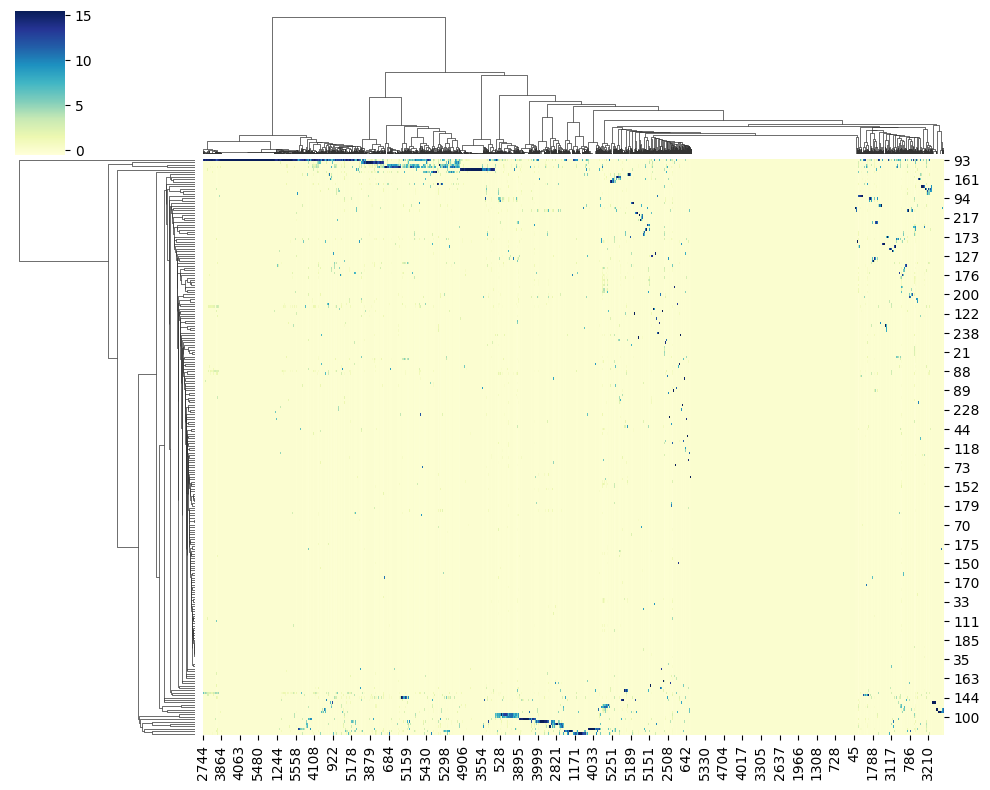

In [49]:

# Create the clustermap with hierarchical clustering
sns.clustermap(scaled_exp,
               method='ward',  # Linkage method (ward, single, complete, average, etc.)
               metric='euclidean',  # Distance metric (euclidean, cityblock, etc.)
               cmap="YlGnBu",       # Colormap
               figsize=(10, 8))    # Figure size

### Right click the plot and save the heatmap as image

# Done. Congratulations!